In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import drive
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Chords_landmarks_Norm.csv')

In [ ]:
data
#data = data[['Class', 'Landmark_2_x','Landmark_1_y','Landmark_3_y','Landmark_2_z','Landmark_3_z','Landmark_4_z']]
#data

,Class,Landmark_1_x,Landmark_2_x,Landmark_3_x,Landmark_4_x,Landmark_5_x,Landmark_6_x,Landmark_7_x,Landmark_8_x,Landmark_9_x,...,Landmark_12_z,Landmark_13_z,Landmark_14_z,Landmark_15_z,Landmark_16_z,Landmark_17_z,Landmark_18_z,Landmark_19_z,Landmark_20_z,Landmark_21_z
0,0,0,0.233333,0.458333,0.641667,0.825000,0.700000,1.000000,1.000000,0.916667,...,-0.915659,-0.926976,-0.522581,-0.868568,-0.899230,-0.846232,-0.596125,-0.849130,-0.869863,-0.833677
1,0,0,0.234234,0.450450,0.630631,0.819820,0.702703,1.000000,0.981982,0.873874,...,-1.127406,-1.144574,-0.626424,-1.033376,-1.060854,-0.995357,-0.698248,-0.996863,-1.025816,-0.989707
2,0,0,0.233333,0.400000,0.533333,0.744444,0.655556,0.933333,0.888889,0.766667,...,-1.766607,-1.847139,-1.034905,-1.583530,-1.657832,-1.629687,-1.122777,-1.528340,-1.600894,-1.604120
3,0,0,0.197917,0.322917,0.416667,0.593750,0.520833,0.697917,0.604167,0.468750,...,-2.078437,-2.158879,-1.312352,-1.888352,-1.946698,-1.933668,-1.347141,-1.820234,-1.930250,-1.971414
4,0,0,0.223301,0.368932,0.485437,0.621359,0.611650,0.805825,0.747573,0.650485,...,-1.621154,-1.650375,-1.041425,-1.515507,-1.536067,-1.493446,-1.077567,-1.472246,-1.551749,-1.564572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,11,0,0.297753,0.556180,0.595506,0.561798,0.584270,0.769663,0.713483,0.606742,...,-0.590171,-0.571224,-0.436072,-0.587514,-0.579017,-0.544823,-0.434574,-0.542356,-0.541587,-0.518304
28796,11,0,0.297753,0.556180,0.595506,0.567416,0.589888,0.769663,0.713483,0.612360,...,-0.594319,-0.582002,-0.437967,-0.587382,-0.583527,-0.554932,-0.441054,-0.543233,-0.540347,-0.518110
28797,11,0,0.299435,0.564972,0.615819,0.593220,0.598870,0.785311,0.728814,0.621469,...,-0.591427,-0.572050,-0.438802,-0.592420,-0.588575,-0.557216,-0.437093,-0.547172,-0.549141,-0.527569
28798,11,0,0.299435,0.564972,0.627119,0.598870,0.593220,0.790960,0.728814,0.627119,...,-0.621428,-0.602604,-0.452456,-0.614798,-0.615838,-0.585803,-0.445969,-0.563081,-0.569995,-0.550824


In [ ]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

In [ ]:
validation_data = (X_val, y_val_encoded)
def create_model(batch_size=32, learning_rate=0.01, activation='relu', neurons=32, validation_data=None):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(3):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(12, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC()])
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train_encoded, epochs=1000, batch_size=batch_size, validation_data=validation_data, callbacks=[early_stopping], verbose=0)
    best_epoch = early_stopping.stopped_epoch + 1
    return model

In [ ]:
param_grid = {
    'model__neurons' : [64, 96, 128],
    'model__batch_size': [32, 64, 128],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
grid_neural = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_neural_result = grid_neural.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=  37.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=  29.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=  38.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=  22.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  24.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  39.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  46.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  36.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  41.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  30.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  35.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  30.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  27.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  47.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  54.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  57.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  41.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  44.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=  38.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=  36.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=  55.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=  51.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=  40.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=  52.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=  51.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=  47.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=  49.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=  38.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time= 3.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time= 2.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time= 3.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time= 2.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=  29.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=  16.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=  14.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=  15.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=  19.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=  17.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=  24.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=  23.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=  29.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=  37.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=  37.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  29.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  31.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  25.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  33.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=  19.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=  31.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=  25.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=  33.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=  28.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time= 1.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time= 2.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time= 1.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=  14.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=  17.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=  17.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=  16.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=  23.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=  16.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=  16.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=  17.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=  19.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=  17.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=  45.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=  33.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=  32.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=  43.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=  30.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time= 1.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time= 2.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
df_cv_results = pd.DataFrame(grid_neural_result.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score',
                               'param_model__learning_rate', 'param_model__batch_size', 'param_model__neurons']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,param_model__learning_rate,param_model__batch_size,param_model__neurons
8,1,0.090885,0.0001,32,128
16,2,0.086589,0.0001,64,96
7,3,0.084592,0.0001,32,96
6,4,0.084028,0.0001,32,64
5,5,0.083984,0.001,32,128
26,6,0.083811,0.0001,128,128
15,6,0.083811,0.0001,64,64
25,8,0.083724,0.0001,128,96
10,9,0.083637,0.01,64,96
20,10,0.083594,0.01,128,128


Text(0.5, 1.0, 'Performance wrt # of batch size and neurons')

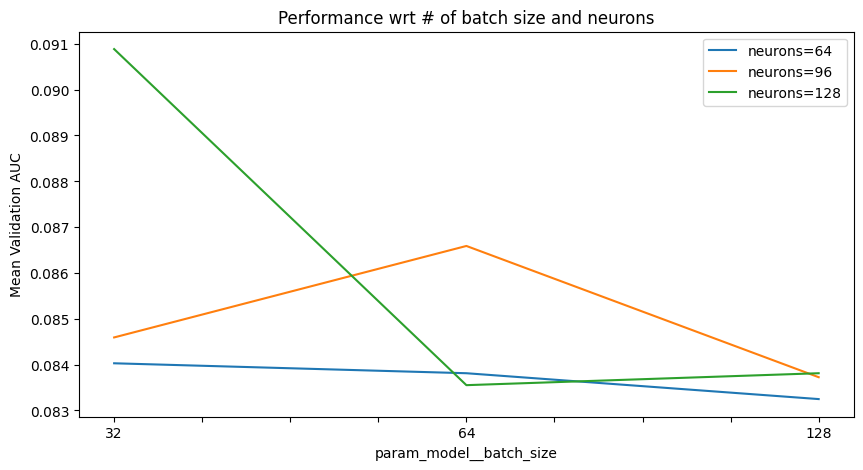

In [ ]:
df_cv_results.sort_values(by='param_model__batch_size', inplace=True)
lr_d64 = df_cv_results.loc[(df_cv_results['param_model__learning_rate']==0.0001) & (df_cv_results['param_model__neurons']==64),:]
lr_d96 = df_cv_results.loc[(df_cv_results['param_model__learning_rate']==0.0001) & (df_cv_results['param_model__neurons']==96),:]
lr_d128 = df_cv_results.loc[(df_cv_results['param_model__learning_rate']==0.0001) & (df_cv_results['param_model__neurons']==128),:]

fig, ax = plt.subplots(figsize=(10,5))
lr_d64.plot(x='param_model__batch_size', y='mean_test_score', label='neurons=64', ax=ax)
lr_d96.plot(x='param_model__batch_size', y='mean_test_score', label='neurons=96', ax=ax)
lr_d128.plot(x='param_model__batch_size', y='mean_test_score', label='neurons=128', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of batch size and neurons')

Text(0.5, 1.0, 'Performance wrt learning rate')

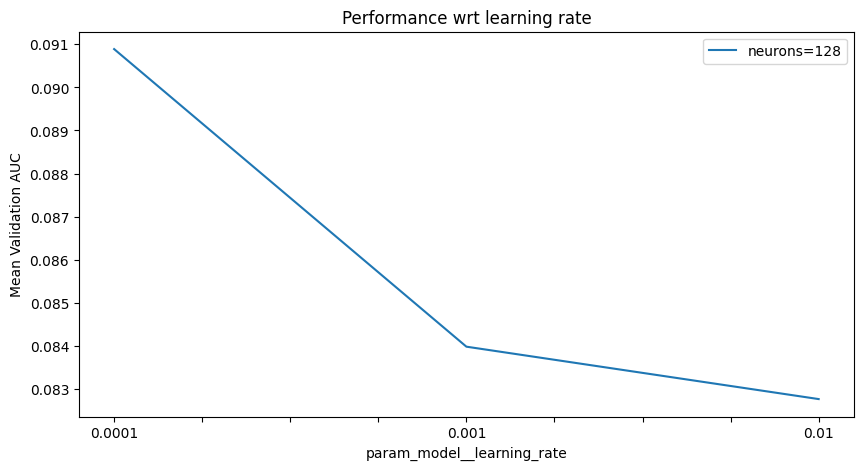

In [ ]:
df_cv_results.sort_values(by='param_model__learning_rate', inplace=True)
lr_t3k_d128 = df_cv_results.loc[(df_cv_results['param_model__batch_size']==32) & (df_cv_results['param_model__neurons']==128),:]
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d128.plot(x='param_model__learning_rate', y='mean_test_score', label='neurons=128', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:
model_neural_fin = tf.keras.models.Sequential()
model_neural_fin.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_neural_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_neural_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_neural_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_neural_fin.add(tf.keras.layers.Dense(12, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_neural_fin.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model_neural_fin.fit(X_train, y_train_encoded, epochs=1000, batch_size=32, callbacks=[early_stopping], validation_data=(X_val, y_val_encoded))
test_loss, test_accuracy = model_neural_fin.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Epoch 1/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2226 - loss: 2.2122 - val_accuracy: 0.5688 - val_loss: 1.3050
Epoch 2/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6166 - loss: 1.1403 - val_accuracy: 0.7808 - val_loss: 0.7304
Epoch 3/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7967 - loss: 0.6703 - val_accuracy: 0.8635 - val_loss: 0.4910
Epoch 4/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8597 - loss: 0.4723 - val_accuracy: 0.8874 - val_loss: 0.3708
Epoch 5/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.3592 - val_accuracy: 0.9043 - val_loss: 0.3008
Epoch 6/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9080 - loss: 0.2932 - val_accuracy: 0.9145 - val_loss: 0.2684
Epoch 7/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9196 - loss: 0.2584 - val_accuracy: 0.9266 - val_loss: 0.2265
Epoch 8/1000
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9296 - loss: 0.2269 - 

In [ ]:
y_pred = model_neural_fin.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


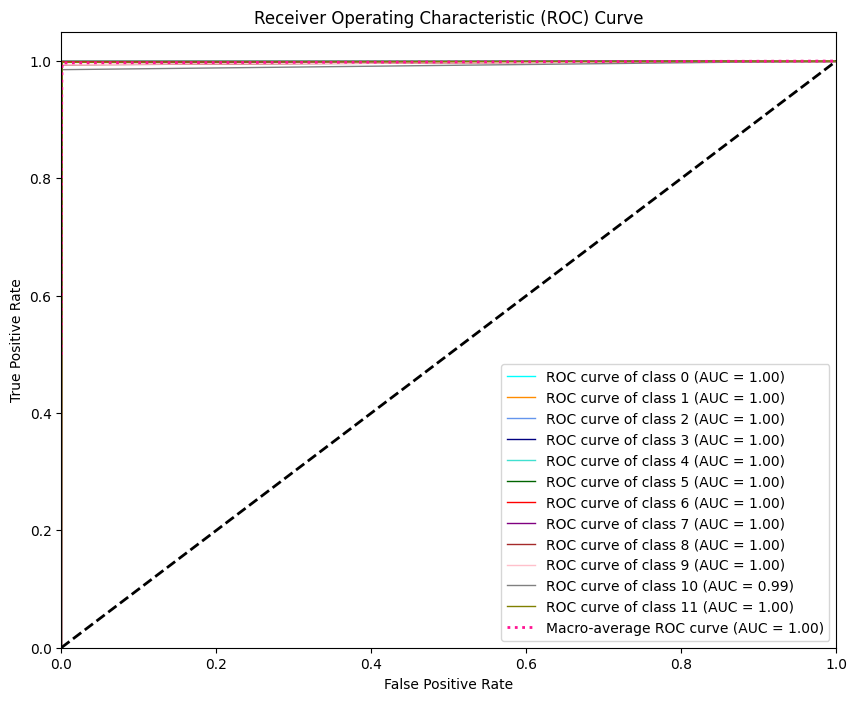

In [ ]:
roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

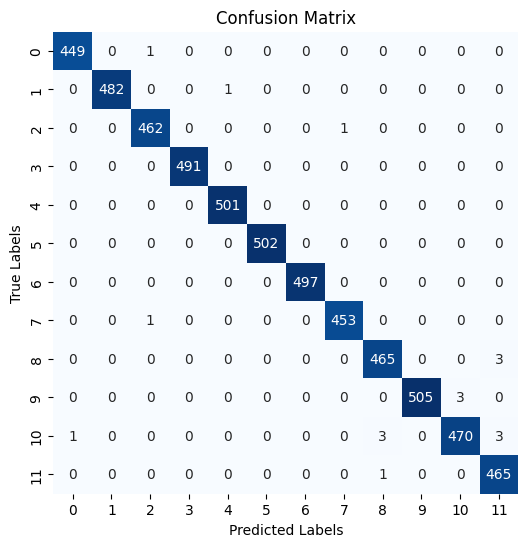

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       483
           2       1.00      1.00      1.00       463
           3       1.00      1.00      1.00       491
           4       1.00      1.00      1.00       501
           5       1.00      1.00      1.00       502
           6       1.00      1.00      1.00       497
           7       1.00      1.00      1.00       454
           8       0.99      0.99      0.99       468
           9       1.00      0.99      1.00       508
          10       0.99      0.99      0.99       477
          11       0.99      1.00      0.99       466

    accuracy                           1.00      5760
   macro avg       1.00      1.00      1.00      5760
weighted avg       1.00      1.00      1.00      5760



In [ ]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
def my_roc_auc_score(model, X, y, num_classes=12):
    y_pred_prob = model.predict(X)
    if len(y.shape) == 1 or y.shape[1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes=num_classes)
    roc_auc = {}
    fpr = {}
    tpr = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= num_classes
    macro_auc = auc(all_fpr, mean_tpr)
    return macro_auc

In [ ]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'n_estimators': [100, 600, 1100, 1600, 2100],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
}

In [ ]:
boost_model = GridSearchCV(estimator=XGBClassifier(subsample=0.5,colsample_bytree=0.25,eval_metric='auc',use_label_encoder='False'),param_grid=param_grid,cv=2,scoring=my_roc_auc_score,return_train_score=True,verbose=4)
boost_model.fit(X_train_val,y_train_val_encoded)


Fitting 2 folds for each of 150 candidates, totalling 300 fits
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.953, test=0.942) total time=   6.3s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.954, test=0.941) total time=   6.7s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=1.000, test=0.992) total time=  20.3s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=1.000, test=0.993) total time=  23.6s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=1100;, score=(train=1.000, test=0.994) total time=  41.4s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=1100;, score=(train=1.000, test=0.994) total time=  41.6s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=1600;, score=(train=1.000, test=0.994) total time= 1.0min
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=1600;, score=(train=1.000, test=0.994) total time= 1.0min
[CV 1/2] END 

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 600, 1100, 1600, 2100]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f2b5126e7a0>, verbose=4)

In [ ]:
df_cv_results = pd.DataFrame(boost_model.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
8,1,0.994204,1.000000,0.1,4,1600
9,2,0.994112,1.000000,0.1,4,2100
3,3,0.994077,1.000000,0.1,2,1600
4,4,0.994043,1.000000,0.1,2,2100
7,5,0.994036,1.000000,0.1,4,1100
...,...,...,...,...,...,...
146,146,0.985341,1.000000,1.1,10,600
145,147,0.985298,1.000000,1.1,10,100
141,148,0.985247,1.000000,1.1,8,600
140,149,0.984775,1.000000,1.1,8,100


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

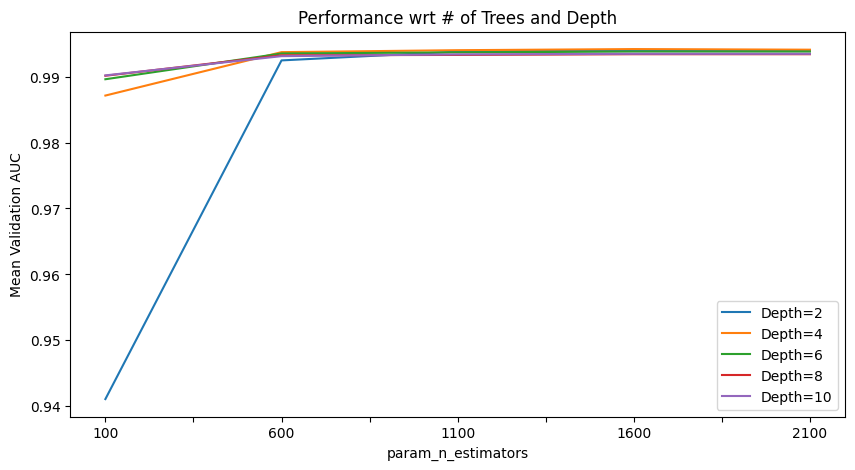

In [ ]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==2),:]
lr_d4 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==4),:]
lr_d6 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==6),:]
lr_d8 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==8),:]
lr_d10 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==10),:]
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d4.plot(x='param_n_estimators', y='mean_test_score', label='Depth=4', ax=ax)
lr_d6.plot(x='param_n_estimators', y='mean_test_score', label='Depth=6', ax=ax)
lr_d8.plot(x='param_n_estimators', y='mean_test_score', label='Depth=8', ax=ax)
lr_d10.plot(x='param_n_estimators', y='mean_test_score', label='Depth=10', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

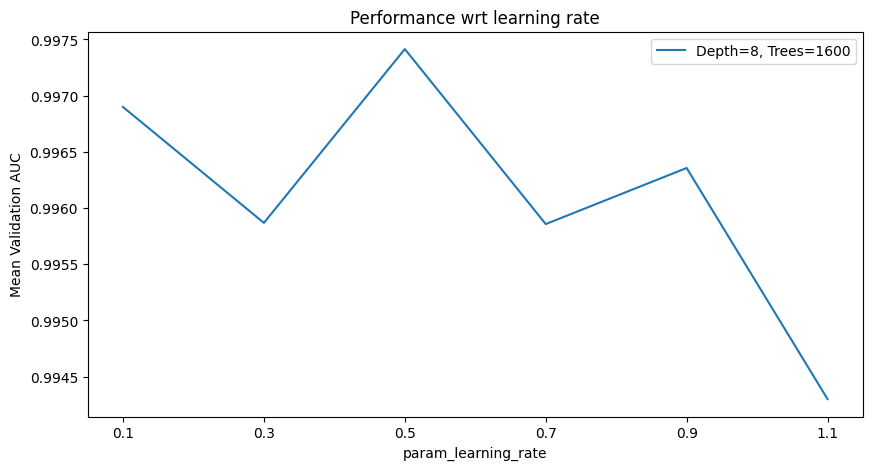

In [ ]:
df_cv_results.sort_values(by='param_learning_rate', inplace=True)
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==1600) & (df_cv_results['param_max_depth']==4),:]
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=4, Trees=1600', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:
model_xgboost_fin = XGBClassifier(learning_rate=0.1,max_depth=4,n_estimators=1600,subsample=0.5,colsample_bytree=0.25,eval_metric='auc',verbosity=1,use_label_encoder=False)
eval_set = [(X_val, y_val)]
model_xgboost_fin.fit(X_train,y_train,early_stopping_rounds=20,eval_set=eval_set,verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95693
[1]	validation_0-auc:0.97784
[2]	validation_0-auc:0.98522
[3]	validation_0-auc:0.98962
[4]	validation_0-auc:0.99160
[5]	validation_0-auc:0.99300
[6]	validation_0-auc:0.99416
[7]	validation_0-auc:0.99496
[8]	validation_0-auc:0.99557
[9]	validation_0-auc:0.99598
[10]	validation_0-auc:0.99656
[11]	validation_0-auc:0.99682
[12]	validation_0-auc:0.99700
[13]	validation_0-auc:0.99718
[14]	validation_0-auc:0.99741
[15]	validation_0-auc:0.99767
[16]	validation_0-auc:0.99779
[17]	validation_0-auc:0.99792
[18]	validation_0-auc:0.99802
[19]	validation_0-auc:0.99815
[20]	validation_0-auc:0.99824
[21]	validation_0-auc:0.99834
[22]	validation_0-auc:0.99844
[23]	validation_0-auc:0.99854
[24]	validation_0-auc:0.99857
[25]	validation_0-auc:0.99867
[26]	validation_0-auc:0.99873
[27]	validation_0-auc:0.99877
[28]	validation_0-auc:0.99883
[29]	validation_0-auc:0.99889
[30]	validation_0-auc:0.99894
[31]	validation_0-auc:0.99898
[32]	validation_0-auc:0.99901
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1600, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_fin_pred = model_xgboost_fin.predict(X_test)
y_fin_pred = np.round(y_fin_pred).astype(int)
y_pred_classes = to_categorical(y_fin_pred, num_classes=12)

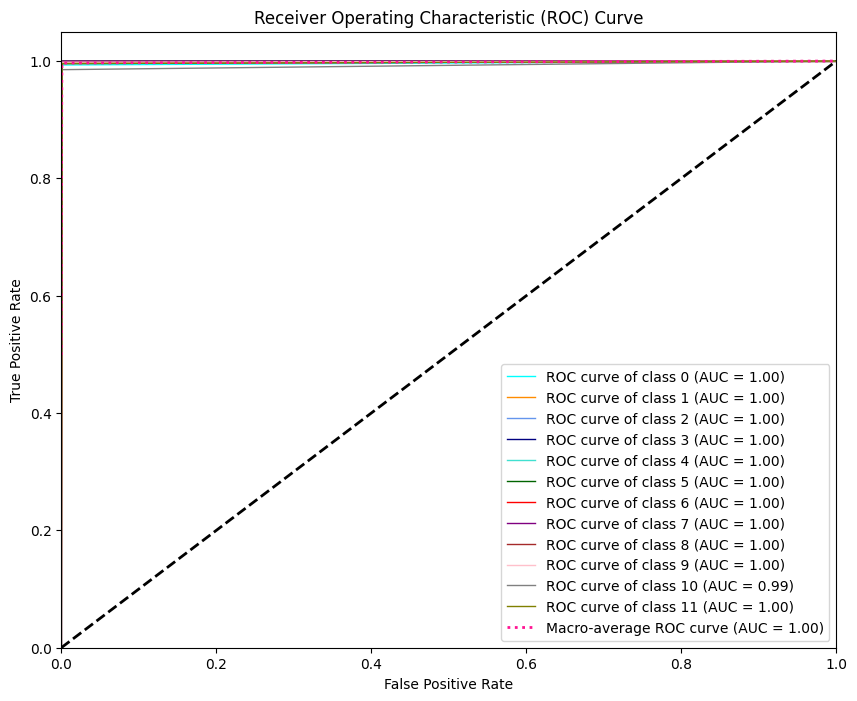

In [ ]:
roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

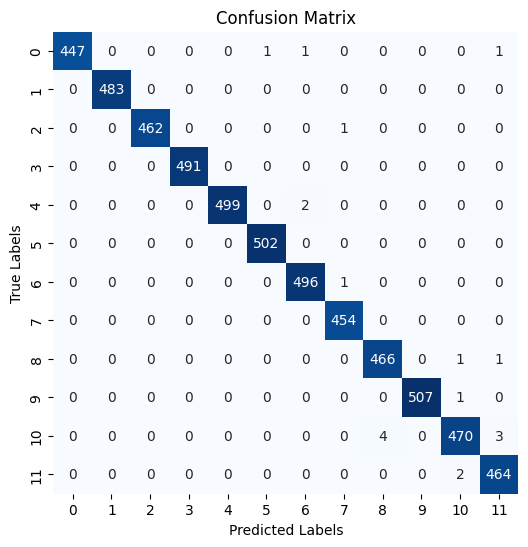

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       450
           1       1.00      1.00      1.00       483
           2       1.00      1.00      1.00       463
           3       1.00      1.00      1.00       491
           4       1.00      1.00      1.00       501
           5       1.00      1.00      1.00       502
           6       0.99      1.00      1.00       497
           7       1.00      1.00      1.00       454
           8       0.99      1.00      0.99       468
           9       1.00      1.00      1.00       508
          10       0.99      0.99      0.99       477
          11       0.99      1.00      0.99       466

    accuracy                           1.00      5760
   macro avg       1.00      1.00      1.00      5760
weighted avg       1.00      1.00      1.00      5760



In [ ]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

Random Forest

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=a3397714cada14840b6a7d7fc09426ed258b5a90d2961a56daab94f022f1a4e2
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tpot import TPOTClassifier

In [ ]:
params_grid = {
    'n_estimators': [100,200,300,400,500,600],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, 12, 14, 16],
    'min_samples_split': [0.001,0.006,0.011,0.016,0.021,0.026],
    'min_samples_leaf': [0.001,0.006,0.011,0.016,0.021,0.026],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': params_grid},
                                 cv = 2, scoring = 'accuracy')
tpot_classifier.fit(X_train_val,y_train_val)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9830729166666667

Generation 2 - Current best internal CV score: 0.9830729166666667

Generation 3 - Current best internal CV score: 0.9830729166666667

Generation 4 - Current best internal CV score: 0.9830729166666667

Generation 5 - Current best internal CV score: 0.9830729166666667

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=600)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [8,
                                                                                      10,
                                                                                      12,
                                                                                      14,
                                                                                      16],
                                                                        'max_features': ['sqrt',
                                                                                         'log2'],
                                                                        'min_samples_leaf': [0.001,
                                                                                             0.006,
                                                                                             0.011,
                                                                                             0.016,
                                                                                             0.021,
                                                                                             0.026],
                                                                        'min_samples_split': [0.001,
                                                                                              0.006,
                                                                                              0.011,
                                                                                              0.016,
                                                                                              0.021,
                                                                                              0.026],
                                                                        'n_estimators': [100,
                                                                                         200,
                                                                                         300,
                                                                                         400,
                                                                                         500,
                                                                                         600]}},
               cv=2, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [ ]:
params_grid = {
    'n_estimators': [300,400,500,600],
    'criterion': ['gini'],
    'max_depth': [12,14,16],
    'min_samples_split': [0.001, 0.006, 0.011],
    'min_samples_leaf': [0.001, 0.006, 0.011],
    'max_features': ['log2']
}

In [ ]:
model_GridRF = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),param_grid=params_grid,cv=2,scoring=my_roc_auc_score,return_train_score=True,verbose=2)
model_GridRF.fit(X_train_val,y_train_val_encoded)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=300; total time=  32.4s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=300; total time=  31.1s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=400; total time=  40.8s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=400; total time=  40.5s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=500; total time=  51.7s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=500; total time=  52.6s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_lea

GridSearchCV(cv=2, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [12, 14, 16],
                         'max_features': ['log2'],
                         'min_samples_leaf': [0.001, 0.006, 0.011],
                         'min_samples_split': [0.001, 0.006, 0.011],
                         'n_estimators': [300, 400, 500, 600]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f5ae079b6d0>, verbose=2)

In [ ]:
df_cv_results = pd.DataFrame(model_GridRF.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results[:20]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
75,1,0.967764,0.980405,600,0.001,0.001,log2,16,gini
73,2,0.967608,0.980404,400,0.001,0.001,log2,16,gini
74,3,0.967272,0.979896,500,0.001,0.001,log2,16,gini
72,4,0.967128,0.979798,300,0.001,0.001,log2,16,gini
38,5,0.967060,0.979638,500,0.001,0.001,log2,14,gini
36,6,0.966981,0.979640,300,0.001,0.001,log2,14,gini
39,7,0.966893,0.979548,600,0.001,0.001,log2,14,gini
37,8,0.966863,0.979411,400,0.001,0.001,log2,14,gini
1,9,0.963000,0.975949,400,0.001,0.001,log2,12,gini
3,10,0.962913,0.976464,600,0.001,0.001,log2,12,gini


In [ ]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)
lr_d12 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='log2') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==12),:]
lr_d14 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='log2') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==14),:]
lr_d16 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='log2') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==16),:]

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

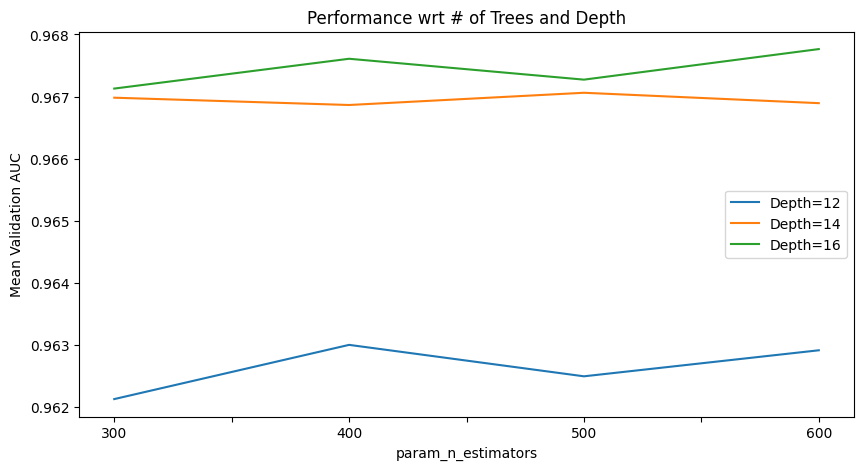

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
lr_d12.plot(x='param_n_estimators', y='mean_test_score', label='Depth=12', ax=ax)
lr_d14.plot(x='param_n_estimators', y='mean_test_score', label='Depth=14', ax=ax)
lr_d16.plot(x='param_n_estimators', y='mean_test_score', label='Depth=16', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

In [ ]:
df_cv_results.sort_values(by='param_min_samples_split', inplace=True)
lr_d01 = df_cv_results.loc[(df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_n_estimators']==600) & (df_cv_results['param_max_features']=='log2') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==16),:]
lr_d06 = df_cv_results.loc[(df_cv_results['param_min_samples_leaf']==0.006) & (df_cv_results['param_n_estimators']==600) & (df_cv_results['param_max_features']=='log2') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==16),:]
lr_d11 = df_cv_results.loc[(df_cv_results['param_min_samples_leaf']==0.011) & (df_cv_results['param_n_estimators']==600) & (df_cv_results['param_max_features']=='log2') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==16),:]

Text(0.5, 1.0, 'Performance with difference split and leaf')

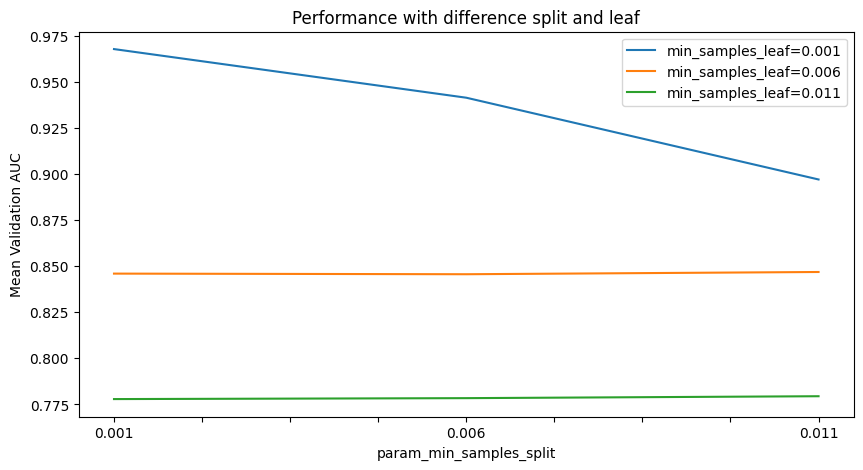

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
lr_d01.plot(x='param_min_samples_split', y='mean_test_score', label='min_samples_leaf=0.001', ax=ax)
lr_d06.plot(x='param_min_samples_split', y='mean_test_score', label='min_samples_leaf=0.006', ax=ax)
lr_d11.plot(x='param_min_samples_split', y='mean_test_score', label='min_samples_leaf=0.011', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance with difference split and leaf')

In [ ]:
model_RF_fin = RandomForestClassifier(max_depth=16,n_estimators=600,min_samples_split=0.001,min_samples_leaf=0.001,max_features='log2',criterion='gini')
model_RF_fin.fit(X_train_val, y_train_val)

RandomForestClassifier(max_depth=16, max_features='log2',
                       min_samples_leaf=0.001, min_samples_split=0.001,
                       n_estimators=600)

In [ ]:
y_fin_pred = model_RF_fin.predict(X_test)
y_fin_pred = np.round(y_fin_pred).astype(int)
y_pred_classes = to_categorical(y_fin_pred, num_classes=12)

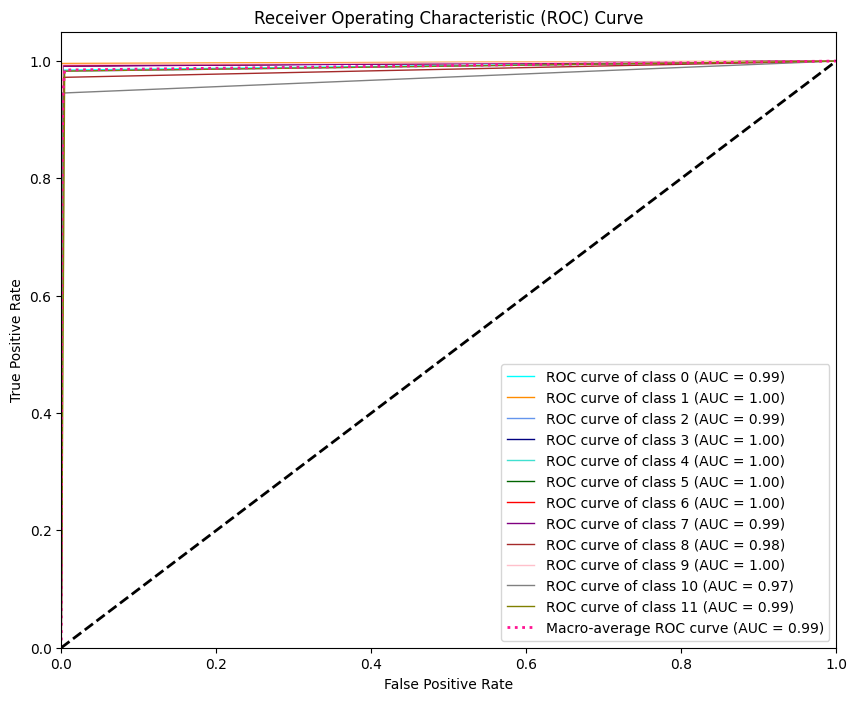

In [ ]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

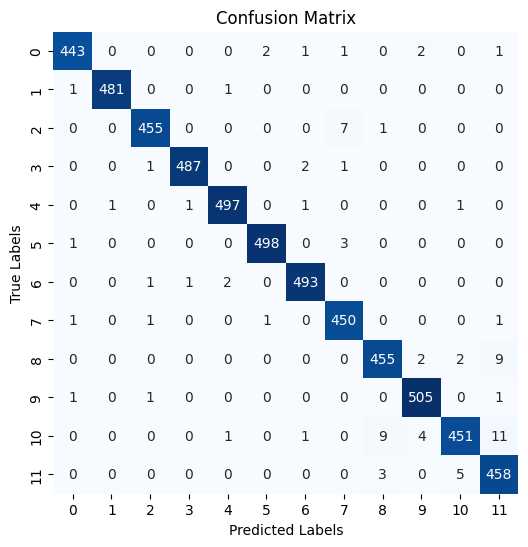

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       450
           1       1.00      1.00      1.00       483
           2       0.99      0.98      0.99       463
           3       1.00      0.99      0.99       491
           4       0.99      0.99      0.99       501
           5       0.99      0.99      0.99       502
           6       0.99      0.99      0.99       497
           7       0.97      0.99      0.98       454
           8       0.97      0.97      0.97       468
           9       0.98      0.99      0.99       508
          10       0.98      0.95      0.96       477
          11       0.95      0.98      0.97       466

    accuracy                           0.98      5760
   macro avg       0.98      0.98      0.98      5760
weighted avg       0.99      0.98      0.98      5760



In [ ]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

In [ ]:
X_train_val_drop = X_train_val.drop(columns=['Landmark_1_x', 'Landmark_2_x', 'Landmark_3_x', 'Landmark_4_x', 'Landmark_5_x', 'Landmark_1_y', 'Landmark_2_y', 'Landmark_3_y', 'Landmark_4_y', 'Landmark_5_y', 'Landmark_1_z', 'Landmark_2_z', 'Landmark_3_z', 'Landmark_4_z', 'Landmark_5_z'])
X_test_drop = X_test.drop(columns=['Landmark_1_x', 'Landmark_2_x', 'Landmark_3_x', 'Landmark_4_x', 'Landmark_5_x', 'Landmark_1_y', 'Landmark_2_y', 'Landmark_3_y', 'Landmark_4_y', 'Landmark_5_y', 'Landmark_1_z', 'Landmark_2_z', 'Landmark_3_z', 'Landmark_4_z', 'Landmark_5_z'])

In [ ]:
model_xgboost_fin = XGBClassifier(learning_rate=0.1,max_depth=4,n_estimators=1600,subsample=0.5,colsample_bytree=0.25,eval_metric='auc',verbosity=1,use_label_encoder=False)
eval_set = [(X_test_drop, y_test)]
model_xgboost_fin.fit(X_train_val_drop,y_train_val,early_stopping_rounds=20,eval_set=eval_set,verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95623
[1]	validation_0-auc:0.97849
[2]	validation_0-auc:0.98476
[3]	validation_0-auc:0.98900
[4]	validation_0-auc:0.99128
[5]	validation_0-auc:0.99290
[6]	validation_0-auc:0.99429
[7]	validation_0-auc:0.99473
[8]	validation_0-auc:0.99514
[9]	validation_0-auc:0.99546
[10]	validation_0-auc:0.99578
[11]	validation_0-auc:0.99600
[12]	validation_0-auc:0.99632
[13]	validation_0-auc:0.99664
[14]	validation_0-auc:0.99694
[15]	validation_0-auc:0.99713
[16]	validation_0-auc:0.99727
[17]	validation_0-auc:0.99743
[18]	validation_0-auc:0.99752
[19]	validation_0-auc:0.99768
[20]	validation_0-auc:0.99783
[21]	validation_0-auc:0.99791
[22]	validation_0-auc:0.99799
[23]	validation_0-auc:0.99806
[24]	validation_0-auc:0.99811
[25]	validation_0-auc:0.99818
[26]	validation_0-auc:0.99822
[27]	validation_0-auc:0.99828
[28]	validation_0-auc:0.99836
[29]	validation_0-auc:0.99847
[30]	validation_0-auc:0.99854
[31]	validation_0-auc:0.99861
[32]	validation_0-auc:0.99865
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1600, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
X_fin_test = pd.read_csv('/content/drive/MyDrive/Chord_test_norm.csv')
y_fin_test = pd.read_csv('/content/drive/MyDrive/Chord_test_class.csv')
y_test_encoded = to_categorical(y_fin_test, num_classes=12)

In [ ]:
X_fin_test_drop = X_fin_test.drop(columns=['Landmark_1_x', 'Landmark_2_x', 'Landmark_3_x', 'Landmark_4_x', 'Landmark_5_x', 'Landmark_1_y', 'Landmark_2_y', 'Landmark_3_y', 'Landmark_4_y', 'Landmark_5_y', 'Landmark_1_z', 'Landmark_2_z', 'Landmark_3_z', 'Landmark_4_z', 'Landmark_5_z'])

In [ ]:
y_fin_pred_test = model_xgboost_fin.predict(X_fin_test_drop)
y_pred_classes = to_categorical(y_fin_pred_test, num_classes=12)

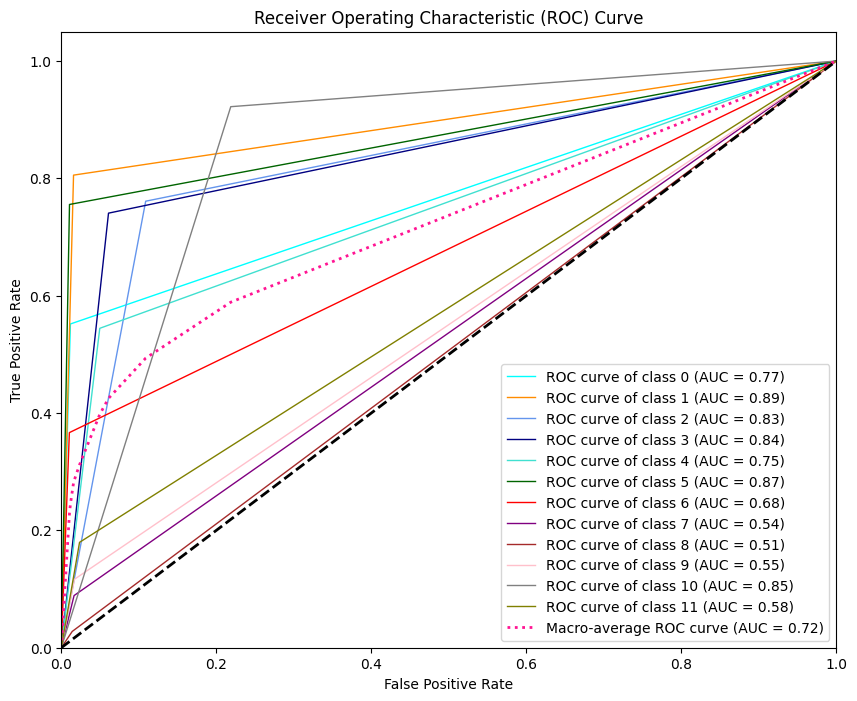

In [ ]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

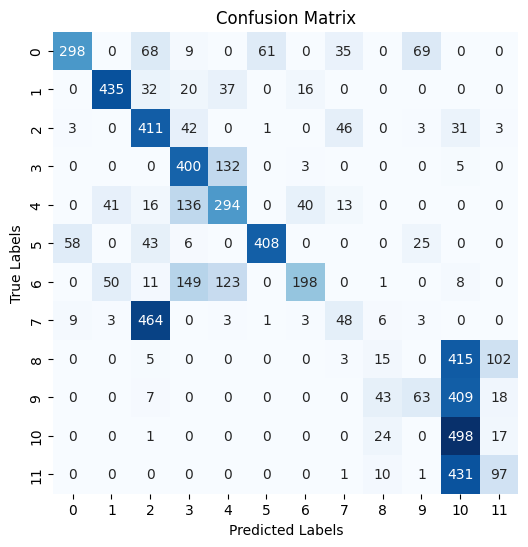

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       540
           1       0.82      0.81      0.81       540
           2       0.39      0.76      0.51       540
           3       0.52      0.74      0.61       540
           4       0.50      0.54      0.52       540
           5       0.87      0.76      0.81       540
           6       0.76      0.37      0.49       540
           7       0.33      0.09      0.14       540
           8       0.15      0.03      0.05       540
           9       0.38      0.12      0.18       540
          10       0.28      0.92      0.43       540
          11       0.41      0.18      0.25       540

    accuracy                           0.49      6480
   macro avg       0.52      0.49      0.46      6480
weighted avg       0.52      0.49      0.46      6480



In [ ]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

In [ ]:
New_data = pd.read_csv('/content/drive/MyDrive/Chord_plus_norm_2.csv')

In [ ]:
X_new = New_data.drop('Class', axis=1)
y_new = New_data['Class']
X_combined = pd.concat([X_train_val, X_new])
y_combined = pd.concat([y_train_val, y_new])
X_combined_drop = X_combined.drop(columns=['Landmark_1_x', 'Landmark_2_x', 'Landmark_3_x', 'Landmark_4_x', 'Landmark_5_x', 'Landmark_1_y', 'Landmark_2_y', 'Landmark_3_y', 'Landmark_4_y', 'Landmark_5_y', 'Landmark_1_z', 'Landmark_2_z', 'Landmark_3_z', 'Landmark_4_z', 'Landmark_5_z'])

In [ ]:
X_train_val_drop_half1, X_train_val_drop_half2, y_train_val_half1, y_train_val_half2 = train_test_split(X_train_val_drop, y_train_val, test_size=0.75, random_state=42)
X_combined_drop_half1, X_combined_drop_half2, y_combined_half1, y_combined_half2 = train_test_split(X_combined_drop, y_combined, test_size=0.5, random_state=42)

In [ ]:
model_xgboost_fin = XGBClassifier(learning_rate=0.1,max_depth=4,n_estimators=1600,subsample=0.5,colsample_bytree=0.25,eval_metric='auc',verbosity=1,use_label_encoder=False)
eval_set = [(X_test_drop, y_test)]
model_xgboost_fin.fit(X_combined_drop,y_combined,early_stopping_rounds=20,eval_set=eval_set,verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.94213
[1]	validation_0-auc:0.96963
[2]	validation_0-auc:0.98211
[3]	validation_0-auc:0.98650
[4]	validation_0-auc:0.98984
[5]	validation_0-auc:0.99126
[6]	validation_0-auc:0.99260
[7]	validation_0-auc:0.99328
[8]	validation_0-auc:0.99366
[9]	validation_0-auc:0.99420
[10]	validation_0-auc:0.99463
[11]	validation_0-auc:0.99499
[12]	validation_0-auc:0.99535
[13]	validation_0-auc:0.99567
[14]	validation_0-auc:0.99602
[15]	validation_0-auc:0.99616
[16]	validation_0-auc:0.99639
[17]	validation_0-auc:0.99662
[18]	validation_0-auc:0.99677
[19]	validation_0-auc:0.99696
[20]	validation_0-auc:0.99718
[21]	validation_0-auc:0.99735
[22]	validation_0-auc:0.99748
[23]	validation_0-auc:0.99757
[24]	validation_0-auc:0.99765
[25]	validation_0-auc:0.99775
[26]	validation_0-auc:0.99786
[27]	validation_0-auc:0.99796
[28]	validation_0-auc:0.99807
[29]	validation_0-auc:0.99813
[30]	validation_0-auc:0.99820
[31]	validation_0-auc:0.99826
[32]	validation_0-auc:0.99829
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1600, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_fin_pred_test = model_xgboost_fin.predict(X_fin_test_drop)
y_pred_classes = to_categorical(y_fin_pred_test, num_classes=12)

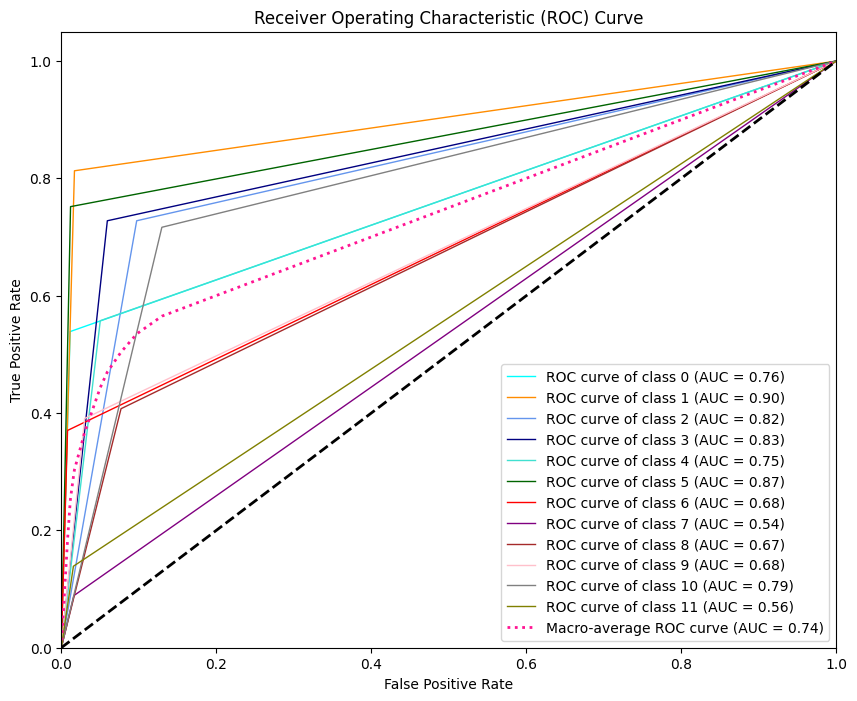

In [ ]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

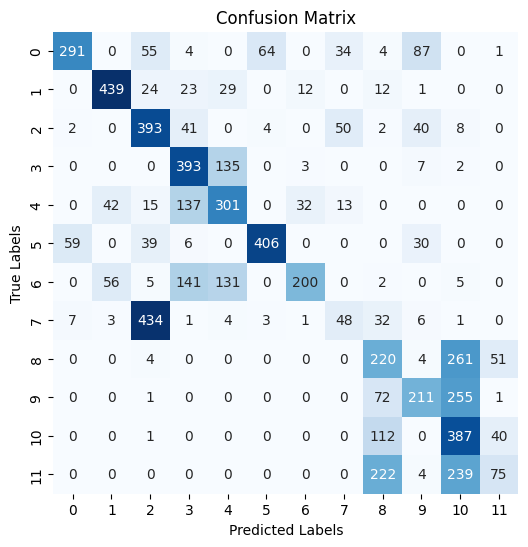

              precision    recall  f1-score   support

           0       0.81      0.54      0.65       540
           1       0.81      0.81      0.81       540
           2       0.40      0.73      0.52       540
           3       0.53      0.73      0.61       540
           4       0.50      0.56      0.53       540
           5       0.85      0.75      0.80       540
           6       0.81      0.37      0.51       540
           7       0.33      0.09      0.14       540
           8       0.32      0.41      0.36       540
           9       0.54      0.39      0.45       540
          10       0.33      0.72      0.46       540
          11       0.45      0.14      0.21       540

    accuracy                           0.52      6480
   macro avg       0.56      0.52      0.50      6480
weighted avg       0.56      0.52      0.50      6480



In [ ]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))